# Summary
1. sklearn - training model
1. numpy stuff
1. matplotlib - plotting
    - Overlaying plots

## sklearn

In [1]:
import pandas as pd
delays_df = pd.read_csv('Data/flight_data.csv')
delays_df[['DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']]

,DISTANCE,CRS_ELAPSED_TIME,ARR_DELAY
0,1670,225,-17.0
1,1670,225,-25.0
2,580,105,-13.0
3,580,105,-12.0
4,580,100,-7.0
...,...,...,...
299995,386,87,-7.0
299996,386,92,-13.0
299997,221,71,-2.0
299998,221,81,-13.0


In [2]:
from sklearn.model_selection import train_test_split
delays_df.dropna(inplace=True)
X = delays_df.loc[:,['DISTANCE', 'CRS_ELAPSED_TIME']]
y = delays_df.loc[:,['ARR_DELAY']]

# create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # train = data that we use for training

In [3]:
# linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# we train our algorithm
regressor.fit(X_train, y_train)

# are predicting values
y_pred = regressor.predict(X_test)
y_pred

array([[3.47739078],
       [5.89055919],
       [4.33288464],
       ...,
       [5.84678979],
       [6.05195889],
       [5.66255414]])

In [4]:
y_test

,ARR_DELAY
291483,-5.0
98997,-12.0
23454,-9.0
110802,-14.0
49449,-20.0
...,...
209898,-20.0
22210,-9.0
165727,-6.0
260838,-33.0


In [5]:
# MSE - mean squared error - mediana kwadratu błedu (błąd średniokwadratowy)
# MSE = mean((actuall_results - predicted) ** 2)
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)

In [6]:
# RMSE - root mean squared error - pierwiastek mediany kwadratu błędu
# sklearn doesn't contain RMSE but we can caulculate it with numpy!

import numpy as np
np.sqrt(mse)

47.4388502617115

you can find few more important accuracy algorithm [here](https://github.com/microsoft/c9-python-getting-started/blob/master/even-more-python-for-beginners-data-tools/13%20-%20Evaluating%20accuracy%20of%20a%20model%20using%20calculations/13%20-%20Evaluate%20accuracy.ipynb)

## numpy

In [7]:
y_pred      # displaying numpy array

array([[3.47739078],
       [5.89055919],
       [4.33288464],
       ...,
       [5.84678979],
       [6.05195889],
       [5.66255414]])

In [8]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df   # displaying pandas dataframe

,0
0,3.477391
1,5.890559
2,4.332885
3,3.447476
4,5.072394
...,...
88745,5.772323
88746,5.519847
88747,5.846790
88748,6.051959


In [9]:
y_pred_df.head()    # head, tail and iloc works only on pandas

,0
0,3.477391
1,5.890559
2,4.332885
3,3.447476
4,5.072394


### numpy vs pandas

dataframes (pandas) are already numbered and its kinda like 1 dimmentional numpy array

## matplotlib

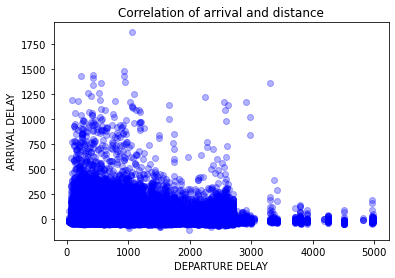

In [10]:
import matplotlib.pyplot as plt

plt.xlabel('DEPARTURE DELAY')
plt.ylabel('ARRIVAL DELAY')
plt.title('Correlation of arrival and distance')

plt.scatter(x=delays_df['DISTANCE'], y=delays_df['ARR_DELAY'],
                        color='blue', alpha=0.3)       # alpha is how bold or light dots are drawn (from 0 to 1)

plt.show()

there is no real nor strong correlation between distance and delay of flight

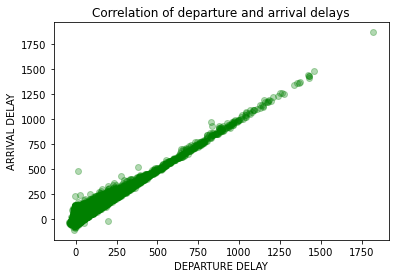

In [11]:
plt.xlabel('DEPARTURE DELAY')
plt.ylabel('ARRIVAL DELAY')
plt.title('Correlation of departure and arrival delays')

plt.scatter(x=delays_df['DEP_DELAY'], y=delays_df['ARR_DELAY'],
                        color='green', alpha=0.3)       # alpha is how bold or light dots are drawn (from 0 to 1)

plt.show()

In [12]:
## sklearn

delays_df.dropna(inplace=True)
X = delays_df.loc[:,['DEP_DELAY']]
y = delays_df.loc[:,['ARR_DELAY']]

# splitting data
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)     # fit method trains model

# training
y_pred = regressor.predict(X_test)

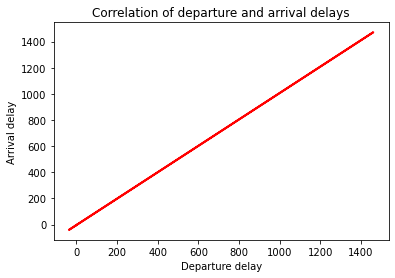

In [13]:
plt.xlabel('Departure delay')
plt.ylabel('Arrival delay')
plt.title('Correlation of departure and arrival delays')

plt.plot(X_test,y_pred,
        color='red', linewidth=2)
    
plt.show()

### Overlaying plots

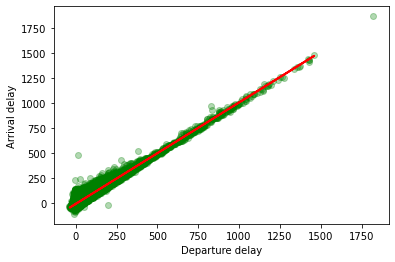

In [14]:
plt.xlabel('Departure delay')
plt.ylabel('Arrival delay')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.scatter(x=delays_df['DEP_DELAY'], y=delays_df['ARR_DELAY'],
            color='green', alpha=0.3)
plt.show()